In [134]:
import pandas as pd
from utils import check_missing_values, show_num_ranges, show_cat_values
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
sns.set(style="whitegrid")

In [136]:
pd.set_option('display.max_columns', None)

In [137]:
df = pd.read_csv('data/Crime_Data_from_2020_to_Present.csv').drop_duplicates()
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [138]:
new_column_names = {
    'DR_NO': 'report_number',
    'Date Rptd': 'date_reported',
    'DATE OCC': 'date_occurred',
    'TIME OCC': 'time_occurred',
    'AREA': 'area_code',
    'AREA NAME': 'area_name',
    'Rpt Dist No': 'report_district_number', #chatgpt report_district
    'Part 1-2': 'crime_part',
    'Crm Cd': 'crime_code',
    'Crm Cd Desc': 'crime_description',
    'Mocodes': 'mocodes',
    'Vict Age': 'victim_age',
    'Vict Sex': 'victim_sex',
    'Vict Descent': 'victim_descent',
    'Premis Cd': 'premises_code',
    'Premis Desc': 'premises_description',
    'Weapon Used Cd': 'weapon_code',
    'Weapon Desc': 'weapon_description',
    'Status': 'status_code',
    'Status Desc': 'status_description',
    'Crm Cd 1': 'crime_code_1',
    'Crm Cd 2': 'crime_code_2',
    'Crm Cd 3': 'crime_code_3',
    'Crm Cd 4': 'crime_code_4',
    'LOCATION': 'location',
    'Cross Street': 'cross_street',
    'LAT': 'latitude',
    'LON': 'longitude'
} # generated by ChatGPT

In [139]:
df.rename(columns=new_column_names, inplace=True)

df.columns

Index(['report_number', 'date_reported', 'date_occurred', 'time_occurred',
       'area_code', 'area_name', 'report_district_number', 'crime_part',
       'crime_code', 'crime_description', 'mocodes', 'victim_age',
       'victim_sex', 'victim_descent', 'premises_code', 'premises_description',
       'weapon_code', 'weapon_description', 'status_code',
       'status_description', 'crime_code_1', 'crime_code_2', 'crime_code_3',
       'crime_code_4', 'location', 'cross_street', 'latitude', 'longitude'],
      dtype='object')

In [140]:
check_missing_values(df)

,Missing_Count,Missing_Percentage
report_number,0,0.000000
date_reported,0,0.000000
date_occurred,0,0.000000
time_occurred,0,0.000000
area_code,0,0.000000
area_name,0,0.000000
report_district_number,0,0.000000
crime_part,0,0.000000
crime_code,0,0.000000
crime_description,0,0.000000


In [141]:
df['number_of_crimes'] = df[['crime_code_1', 'crime_code_2', 'crime_code_3', 'crime_code_4']].notna().sum(axis=1)
df['number_of_crimes'].value_counts()

number_of_crimes
1    935903
2     66810
3      2251
4        64
Name: count, dtype: int64

In [142]:
df['victim_age'] = df['victim_age'].replace(0, np.nan)
check_missing_values(df)

,Missing_Count,Missing_Percentage
report_number,0,0.000000
date_reported,0,0.000000
date_occurred,0,0.000000
time_occurred,0,0.000000
area_code,0,0.000000
area_name,0,0.000000
report_district_number,0,0.000000
crime_part,0,0.000000
crime_code,0,0.000000
crime_description,0,0.000000


In [143]:
df.dtypes

report_number               int64
date_reported              object
date_occurred              object
time_occurred               int64
area_code                   int64
area_name                  object
report_district_number      int64
crime_part                  int64
crime_code                  int64
crime_description          object
mocodes                    object
victim_age                float64
victim_sex                 object
victim_descent             object
premises_code             float64
premises_description       object
weapon_code               float64
weapon_description         object
status_code                object
status_description         object
crime_code_1              float64
crime_code_2              float64
crime_code_3              float64
crime_code_4              float64
location                   object
cross_street               object
latitude                  float64
longitude                 float64
number_of_crimes            int64
dtype: object

In [144]:
df.loc[:, 'date_reported'] = pd.to_datetime(df['date_reported'], format='%m/%d/%Y %I:%M:%S %p').dt.date
df['date_reported'].head()

0    2020-03-01
1    2020-02-09
2    2020-11-11
3    2023-05-10
4    2020-09-09
Name: date_reported, dtype: object

In [145]:
df.loc[:, 'date_occurred'] = pd.to_datetime(df['date_occurred'], format='%m/%d/%Y %I:%M:%S %p').dt.date
df['date_occurred'].head()

0    2020-03-01
1    2020-02-08
2    2020-11-04
3    2020-03-10
4    2020-09-09
Name: date_occurred, dtype: object

In [146]:
df['time_occurred'] = pd.to_datetime(df['time_occurred'].astype(str).str.zfill(4),
                                           format='%H%M').dt.strftime('%H:%M')
df['time_occurred'].head()

0    21:30
1    18:00
2    17:00
3    20:37
4    06:30
Name: time_occurred, dtype: object

In [147]:
show_num_ranges(df)

,Min,Max,dtype,NaN Count
report_number,817.00,2.521041e+08,int64,0
area_code,1.00,2.100000e+01,int64,0
report_district_number,101.00,2.199000e+03,int64,0
crime_part,1.00,2.000000e+00,int64,0
crime_code,110.00,9.560000e+02,int64,0
victim_age,-4.00,1.200000e+02,float64,269258
premises_code,101.00,9.760000e+02,float64,16
weapon_code,101.00,5.160000e+02,float64,677800
crime_code_1,110.00,9.560000e+02,float64,11
crime_code_2,210.00,9.990000e+02,float64,935892


In [148]:
df.area_code = df.area_code.astype('category')

In [149]:
df.crime_part.value_counts()

crime_part
1    602728
2    402300
Name: count, dtype: int64

In [150]:
crime_part_mapping = {1: True, 2: False}
pd.DataFrame(list(crime_part_mapping.items()), columns=['crime_part_original', 'crime_part_bool']).to_csv('data/crime_part.csv', index=False)
df.crime_part = df.crime_part.map(crime_part_mapping)
df.crime_part.dtype

dtype('bool')

In [151]:
df.number_of_crimes = df.number_of_crimes.astype('uint8')
df.number_of_crimes.value_counts()

number_of_crimes
1    935903
2     66810
3      2251
4        64
Name: count, dtype: int64

In [152]:
victim_age_until_20 = df.loc[df['victim_age'] <= 20, 'victim_age']

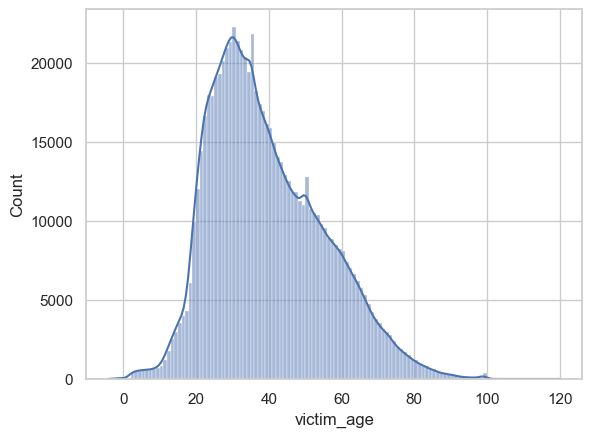

In [153]:
sns.histplot(df.victim_age, bins=range(int(df.victim_age.min()), int(df.victim_age.max()) + 1), kde=True)
plt.show()

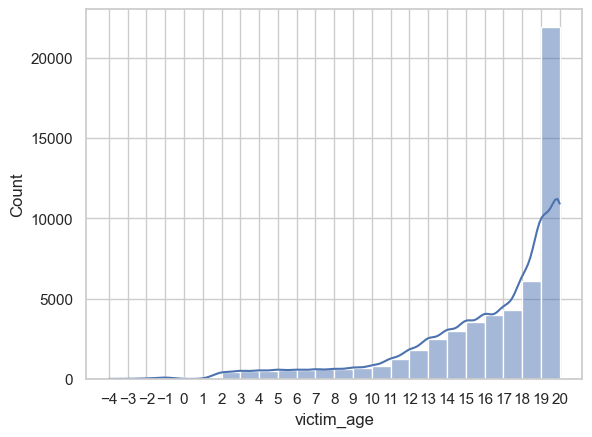

In [154]:
sns.histplot(victim_age_until_20, bins=range(int(victim_age_until_20.min()), int(victim_age_until_20.max()) + 1), kde=True)
plt.xticks(range(int(victim_age_until_20.min()), int(victim_age_until_20.max()) + 1))
plt.show()

In [155]:
df.loc[df.victim_age <= 10, 'victim_age'] = np.nan

df.victim_age.min()

np.float64(11.0)

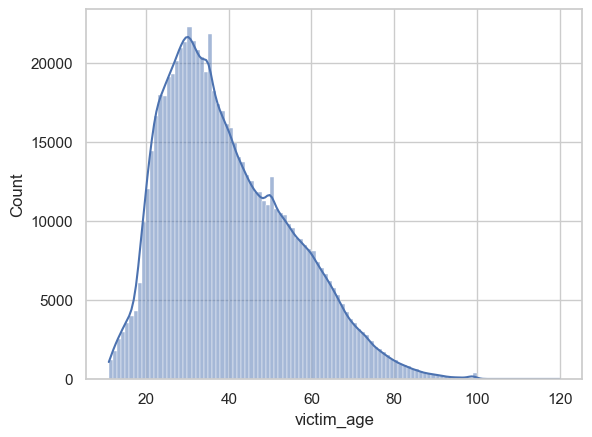

In [156]:
sns.histplot(df.victim_age, bins=range(int(df.victim_age.min()), int(df.victim_age.max()) + 1), kde=True)
plt.show()

In [157]:
show_cat_values(df)

,Unique Values,dtype,NaN Count
date_reported,1865,object,0
date_occurred,1859,object,0
time_occurred,1439,object,0
area_code,21,category,0
area_name,21,object,0
crime_part,2,bool,0
crime_description,140,object,0
mocodes,310837,object,151684
victim_sex,5,object,144694
victim_descent,20,object,144706


In [158]:
df.victim_sex.value_counts()

victim_sex
M    403878
F    358578
X     97763
H       114
-         1
Name: count, dtype: int64

In [159]:
df.loc[df.victim_sex.isin(['X', 'H', '-']), 'victim_sex'] = np.nan
df.victim_sex.value_counts()

victim_sex
M    403878
F    358578
Name: count, dtype: int64

In [160]:
victim_sex_mapping = {'M': True, 'F': False}
pd.DataFrame(list(victim_sex_mapping.items()), columns=['victim_sex_original', 'victim_sex_bool']).to_csv('data/victim_sex.csv', index=False)
df.victim_sex = df.victim_sex.map(victim_sex_mapping)
df.victim_sex.dtype

dtype('O')

In [161]:
df.victim_sex = df.victim_sex.astype('boolean')
df.victim_sex.value_counts(), df.victim_sex.dtype, df.victim_sex.isna().sum()

(victim_sex
 True     403878
 False    358578
 Name: count, dtype: Int64,
 BooleanDtype,
 np.int64(242572))

In [162]:
df.loc[df.victim_descent == '-', 'victim_descent'] = np.nan
df.victim_descent.value_counts()

victim_descent
H    296407
W    201442
B    135817
X    106671
O     78001
A     21340
K      5990
F      4840
C      4631
J      1586
V      1194
I      1015
Z       577
P       288
U       221
D        91
L        77
G        74
S        58
Name: count, dtype: int64

In [163]:
df.victim_descent = df.victim_descent.astype('category')
df.victim_descent.value_counts()

victim_descent
H    296407
W    201442
B    135817
X    106671
O     78001
A     21340
K      5990
F      4840
C      4631
J      1586
V      1194
I      1015
Z       577
P       288
U       221
D        91
L        77
G        74
S        58
Name: count, dtype: int64

In [164]:
df.status_code.value_counts()

status_code
IC    804396
AO    108883
AA     86639
JA      3245
JO      1858
CC         6
Name: count, dtype: int64

In [165]:
df.status_code = df.status_code.astype('category')

In [166]:
show_cat_values(df)

,Unique Values,dtype,NaN Count
date_reported,1865,object,0
date_occurred,1859,object,0
time_occurred,1439,object,0
area_code,21,category,0
area_name,21,object,0
crime_part,2,bool,0
crime_description,140,object,0
mocodes,310837,object,151684
victim_sex,2,boolean,242572
victim_descent,19,category,144708


In [167]:
df['crime_codes'] = df[['crime_code_1', 'crime_code_2', 'crime_code_3', 'crime_code_4']].values.tolist()
df.head()

,report_number,date_reported,date_occurred,time_occurred,area_code,area_name,report_district_number,crime_part,crime_code,crime_description,mocodes,victim_age,victim_sex,victim_descent,premises_code,premises_description,weapon_code,weapon_description,status_code,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude,number_of_crimes,crime_codes
0,190326475,2020-03-01,2020-03-01,21:30,7,Wilshire,784,True,510,VEHICLE - STOLEN,NaN,NaN,True,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2,"[510.0, 998.0, nan, nan]"
1,200106753,2020-02-09,2020-02-08,18:00,1,Central,182,True,330,BURGLARY FROM VEHICLE,1822 1402 0344,47.0,True,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2,"[330.0, 998.0, nan, nan]"
2,200320258,2020-11-11,2020-11-04,17:00,3,Southwest,356,True,480,BIKE - STOLEN,0344 1251,19.0,<NA>,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,1,"[480.0, nan, nan, nan]"
3,200907217,2023-05-10,2020-03-10,20:37,9,Van Nuys,964,True,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19.0,True,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,1,"[343.0, nan, nan, nan]"
4,200412582,2020-09-09,2020-09-09,06:30,4,Hollenbeck,413,True,510,VEHICLE - STOLEN,NaN,NaN,<NA>,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,1,"[510.0, nan, nan, nan]"


In [168]:
df.shape

(1005028, 30)

In [169]:
df = df.drop(columns=['crime_code_1', 'crime_code_2', 'crime_code_3', 'crime_code_4'])
df.shape

(1005028, 26)

In [170]:
df.loc[df.mocodes.notna(), 'mocodes'] = df.loc[df.mocodes.notna(), 'mocodes'].str.split()

df.mocodes.head()

0                   NaN
1    [1822, 1402, 0344]
2          [0344, 1251]
3          [0325, 1501]
4                   NaN
Name: mocodes, dtype: object

In [171]:
df_event_columns = ['report_number', 'date_reported', 'date_occurred', 'time_occurred', 'area_code', 'report_district_number', 
                    'crime_part', 'crime_codes', 'mocodes', 'victim_age', 'victim_sex', 'victim_descent', 'premises_code', 
                    'weapon_code', 'status_code', 'number_of_crimes']

df_area_columns = ['area_code', 'area_name', 'location']
df_crime_columns = ['crime_code', 'crime_description']
df_premises_columns = ['premises_code', 'premises_description']
df_weapon_columns = ['weapon_code', 'weapon_description']
df_status_columns = ['status_code', 'status_description']

In [172]:
df[df_event_columns].to_pickle("data/event.pkl")
df[df_area_columns].drop_duplicates().to_csv("data/area.csv", index=False)
df[df_crime_columns].drop_duplicates().to_csv("data/crime.csv", index=False)
df[df_premises_columns].drop_duplicates().to_csv("data/premises.csv", index=False)
df[df_weapon_columns].drop_duplicates().to_csv("data/weapon.csv", index=False)
df[df_status_columns].drop_duplicates().to_csv("data/status.csv", index=False)